In [1]:
import networkx as nx

n = 20
G = nx.complete_graph(n)

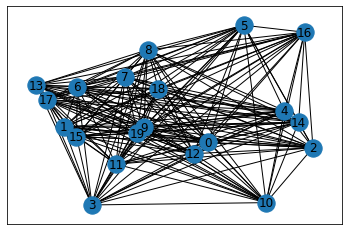

In [2]:
import random

my_pos = { i:(random.random(),random.random()) for i in G.nodes}
nx.draw_networkx(G,my_pos,with_labels=True)

In [3]:
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

In [4]:
def nearest_neighbor_heuristic(G):
    tour = [0]
    while len(tour) < G.number_of_nodes():
        i = tour[-1]
        min_length = min( G.edges[i,j]['length'] for j in G.neighbors(i) if j not in tour)
        nearest_neighbors = [ j for j in G.neighbors(i) if j not in tour and G.edges[i,j]['length'] == min_length ]
        j = nearest_neighbors[0]
        tour.append(j)
    return tour

In [5]:
tour = nearest_neighbor_heuristic(G)
print(tour)

tour_edges = [ (tour[i-1], tour[i] ) for i in range(G.number_of_nodes()) ]
print(tour_edges)

[0, 12, 19, 9, 18, 7, 8, 6, 17, 13, 1, 15, 11, 3, 10, 2, 14, 4, 16, 5]
[(5, 0), (0, 12), (12, 19), (19, 9), (9, 18), (18, 7), (7, 8), (8, 6), (6, 17), (17, 13), (13, 1), (1, 15), (15, 11), (11, 3), (3, 10), (10, 2), (2, 14), (14, 4), (4, 16), (16, 5)]


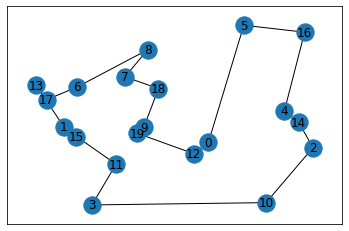

In [6]:
nx.draw_networkx(G.edge_subgraph(tour_edges), pos=my_pos)